### Problem 3.1

1. Shipments of Household Appliances: Line Graphs. The
file ApplianceShipments.csv contains the series of quarterly
shipments (in millions of dollars) of US household appliances
between 1985 and 1989.
* a. Create a well-formatted time plot of the data using Python.
* b. Does there appear to be a quarterly pattern? For a closer
view of the patterns, zoom in to the range of 3500–5000 on
the y-axis.
* c. Using Python, create one chart with four separate lines, one
line for each of Q1, Q2, Q3, and Q4. In Python, this can be
achieved by add column for quarter and year. Then group
the data frame by quarter and then plot shipment versus
year for each quarter as a separate series on a line graph.
Zoom in to the range of 3500–5000 on the y-axis. Does
there appear to be a difference between quarters?
* d. Using Python, create a line graph of the series at a yearly
aggregated level (i.e., the total shipments in each year).

In [92]:
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from dmba import regressionSummary

### Part a - b

In [93]:
shipments_df = pd.read_csv("ApplianceShipments.csv")

In [94]:
shipments_df

,Quarter,Shipments
0,Q1-1985,4009
1,Q2-1985,4321
2,Q3-1985,4224
3,Q4-1985,3944
4,Q1-1986,4123
5,Q2-1986,4522
6,Q3-1986,4657
7,Q4-1986,4030
8,Q1-1987,4493
9,Q2-1987,4806


In [95]:
shipments_new_df = shipments_df.iloc[0:,1:2]
date_range = pd.date_range(start='1/1/1985', end='12/31/1989', freq='Q')
shipments_new_df['Date'] = pd.to_datetime(date_range)

In [96]:
shipments_new_df

,Shipments,Date
0,4009,1985-03-31
1,4321,1985-06-30
2,4224,1985-09-30
3,3944,1985-12-31
4,4123,1986-03-31
5,4522,1986-06-30
6,4657,1986-09-30
7,4030,1986-12-31
8,4493,1987-03-31
9,4806,1987-06-30


In [97]:
# convert dataframe column to series (name is used to label the data)

shipments_ts = pd.Series(shipments_new_df.Shipments.values, index=shipments_new_df.Date, name='Shipments')

In [98]:
shipments_ts

Date
1985-03-31    4009
1985-06-30    4321
1985-09-30    4224
1985-12-31    3944
1986-03-31    4123
1986-06-30    4522
1986-09-30    4657
1986-12-31    4030
1987-03-31    4493
1987-06-30    4806
1987-09-30    4551
1987-12-31    4485
1988-03-31    4595
1988-06-30    4799
1988-09-30    4417
1988-12-31    4258
1989-03-31    4245
1989-06-30    4900
1989-09-30    4585
1989-12-31    4533
Name: Shipments, dtype: int64

In [99]:
# define the time series frequency

shipments_ts.index = pd.DatetimeIndex(shipments_ts.index,
freq=shipments_ts.index.inferred_freq)

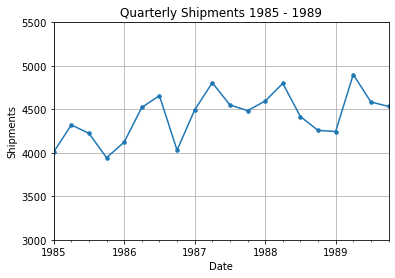

In [134]:
# plot the series
ax = shipments_ts.plot(style='.-', markersize = '7')
ax.set_xlabel('Date')
ax.set_ylabel('Shipments')
ax.set_ylim(3000, 5500)
ax.grid()
ax.set_title("Quarterly Shipments 1985 - 1989")
plt.show()

### part c

In [101]:
shipments_df[['Quarter','Year']] = shipments_df['Quarter'].str.split('-',expand=True)
shipments_df

,Quarter,Shipments,Year
0,Q1,4009,1985
1,Q2,4321,1985
2,Q3,4224,1985
3,Q4,3944,1985
4,Q1,4123,1986
5,Q2,4522,1986
6,Q3,4657,1986
7,Q4,4030,1986
8,Q1,4493,1987
9,Q2,4806,1987


ax = shipments_df.plot()
ax.set_xlabel('Year')
ax.set_ylabel('Shipments')
ax.set_ylim(3000, 5500)
ax.grid()
ax.set_title("Shipments by Quarter 1985 - 1989")
plt.show()

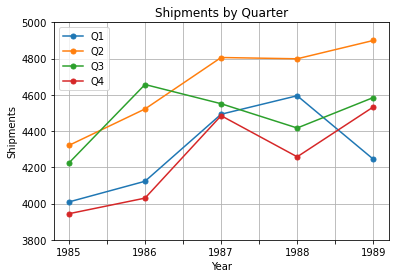

In [131]:
fig, ax = plt.subplots()

for Quarter, grp in shipments_df.groupby(['Quarter']):
    ax = grp.plot(style='.-', markersize = '10', ax=ax, kind='line', x='Year', y='Shipments', label=Quarter)

plt.legend(loc='best')
ax.set_xlabel('Year')
ax.set_ylabel('Shipments')
ax.set_ylim(3800, 5000)
ax.grid()
ax.set_title("Shipments by Quarter")

plt.show()

### Part d

In [124]:
shipments_by_year_df = shipments_df.groupby(['Year']).sum(['Shipments'])
shipments_by_year_df

,Shipments
Year,
1985,16498
1986,17332
1987,18335
1988,18069
1989,18263


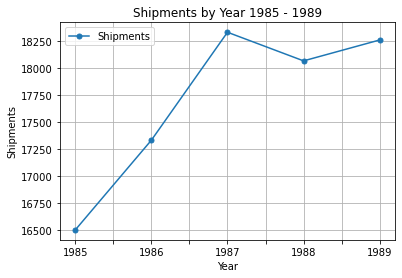

In [128]:
ax = shipments_by_year_df.plot(style='.-', markersize = '10')
ax.set_xlabel('Year')
ax.set_ylabel('Shipments')
ax.grid()
ax.set_title("Shipments by Year 1985 - 1989")
plt.show()

### Problem 3.2
A company that manufactures riding mowers wants to identify the best sales
prospects for an intensive sales campaign. In particular, the
manufacturer is interested in classifying households as
prospective owners or nonowners on the basis of Income (in
$1000s) and Lot Size (in 1000 ft2). The marketing expert looked
at a random sample of 24 households, given in the file
RidingMowers.csv.
* a. Using Python, create a scatter plot of Lot Size vs. Income,
color-coded by the outcome variable owner/nonowner.
Make sure to obtain a well-formatted plot (create legible
labels and a legend, etc.).

In [104]:
mowers_df = pd.read_csv('RidingMowers.csv')

In [105]:
mowers_df

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner
5,110.1,19.2,Owner
6,108.0,17.6,Owner
7,82.8,22.4,Owner
8,69.0,20.0,Owner
9,93.0,20.8,Owner


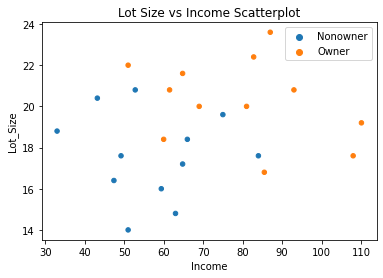

In [106]:
#scatter plot with axes names

scatter = mowers_df.plot.scatter(x='Income', y='Lot_Size', c=['C0' if c == "Nonowner"
else 'C1' for c in mowers_df.Ownership], title = "Lot Size vs Income Scatterplot")

colors = {'Nonowner': 'C0', 'Owner': 'C1'}

plt.legend(handles=[plt.scatter([],[], c=color, label=label) for label, color in colors.items()])

### Problem 3.3
The file LaptopSalesJanuary2008.csv contains
data for all sales of laptops at a computer chain in London in
January 2008. This is a subset of the full dataset that includes
data for the entire year.
* a. Create a bar chart, showing the average retail price by store.
Which store has the highest average? Which has the lowest?
* b. To better compare retail prices across stores, create side-byside
boxplots of retail price by store. Now compare the
prices in the two stores from (a). Does there seem to be a
difference between their price distributions?

In [107]:
laptop_df = pd.read_csv('LaptopSales.csv')

In [108]:
laptop_df

,Date,Configuration,Customer Postcode,Store Postcode,Retail Price,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),Integrated Wireless?,HD Size (GB),Bundled Applications?,customer X,customer Y,store X,store Y
0,1/1/2008 0:01,163,EC4V 5BH,SE1 2BN,455.0,15,5,1,2.0,Yes,80,Yes,532041,180995,534057.0,179682.0
1,1/1/2008 0:02,320,SW4 0JL,SW12 9HD,545.0,15,6,1,2.0,No,300,No,529240,175537,528739.0,173080.0
2,1/1/2008 0:04,23,EC3V 1LR,E2 0RY,515.0,15,4,1,2.0,Yes,300,Yes,533095,181047,535652.0,182961.0
3,1/1/2008 0:04,169,SW1P 3AU,SE1 2BN,395.0,15,5,1,2.0,No,40,Yes,529902,179641,534057.0,179682.0
4,1/1/2008 0:06,365,EC4V 4EG,SW1V 4QQ,585.0,15,6,2,2.0,No,120,Yes,531684,180948,528924.0,178440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297567,12/30/2008 23:55,703,SE1 2UP,SW1P 3AU,NaN,17,5,4,2.0,No,300,Yes,533595,180025,529902.0,179641.0
297568,12/30/2008 23:55,731,N13 4JD,N3 1DH,392.0,17,6,1,1.5,No,80,Yes,531165,192973,525109.0,190628.0
297569,12/30/2008 23:57,375,SE25 6EF,CR7 8LE,441.0,15,6,2,2.4,Yes,300,Yes,534086,168521,532714.0,168302.0
297570,12/30/2008 23:58,101,SW8 1LA,SW1P 3AU,406.0,15,4,4,1.5,Yes,120,Yes,530716,177488,529902.0,179641.0


### Part a)

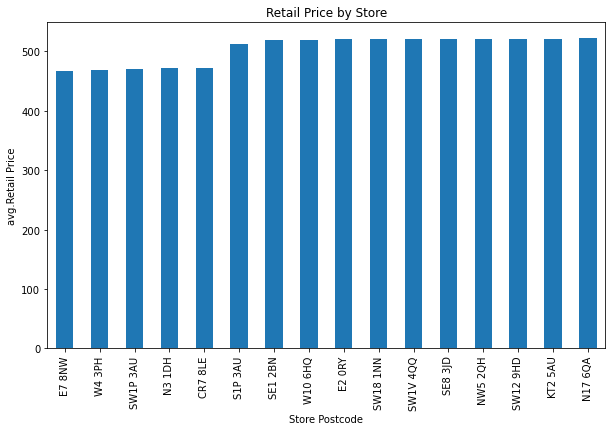

In [109]:
## barchart of average retail price by store

dataForPlot = laptop_df.groupby('Store Postcode').mean()['Retail Price']
dataForPlot_sorted = dataForPlot.sort_values()
ax = dataForPlot_sorted.plot(kind='bar', figsize=[10, 6])
ax.set_ylabel('avg.Retail Price')
ax.set_title('Retail Price by Store')
plt.show()

In [135]:
avg_price = laptop_df.groupby('Store Postcode').mean()['Retail Price']
round_price = round(avg_price, 2)

print(sorted(round_price))

[466.95, 469.22, 469.92, 471.31, 471.83, 512.08, 520.03, 520.05, 520.19, 520.33, 520.36, 520.71, 521.08, 521.22, 521.51, 522.94]


The different shops were identified by their postal code, from the graph we can see that the average price tends to be quite similar among the stores, however, the store showing the minimum price is the one individuated by the postal code E78NW (466.95) while the one selling at the maximum average price is the one identified by the postal code N176QA (522.94).

### Part b)

Text(0.5, 1.0, '')

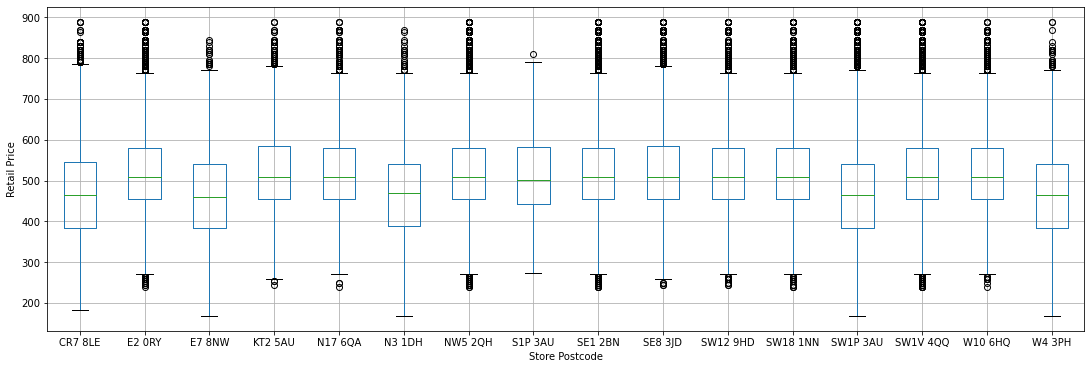

In [136]:
# boxplot of average Retail Price for different Stores

ax = laptop_df.boxplot(column='Retail Price', by='Store Postcode', figsize=[18, 6])
ax.set_ylabel('Retail Price')
plt.suptitle("") # Suppress the titles
plt.title("")

The boxplots of the stores identified by postal codes E78NW and N176QA are, respectively, the third and the fifth in our graph, they show a slightly more spreaded distribution for the price in store E78NW and the presence of several upper outliers for both and two lower outliers for store N176QA. Overall, we can see that the median price and the first and third quartiles are all higher for store N176QA.